## *How should I price auto insurance in the United States?*

## Introduction

**Business Context.** The ability to price an insurance quote properly has a significant impact on insurers' management decisions and financial statements. You are the chief data scientist at a new startup insurance company focusing on providing affordable insurance to millennials. You are tasked to assess the current state of insurance companies to see what factors large insurance providers charge premiums for. Fortunately for you, your company has compiled a dataset by surveying what people currently pay for insurance from large companies. Your findings will be used as the basis of developing your company's millenial car insurance offering. 

**Business Problem.** Our task is to build a **minimal** model to predict the cost of insurance from the data set using various characteristics of a policyholder.

**Analytical Context.** The data resides in a CSV file which has been pre-cleaned for you and can directly be read in. Throughout the case, we will be iterating on our initial model many times based on common pitfalls that arise which we discussed in previous cases. We will be using the Python `statsmodels` package to create and analyze these linear models.

In [55]:
### Load relevant packages

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os

# This statement allow to display plot without asking to 
%matplotlib inline

# always make it pretty 
plt.style.use('ggplot')

### Diving Into The Data

In [56]:
df = pd.read_csv('Allstate-cost-cleaned.csv',
    dtype = { # indicate categorical variables
        'A': 'category',
        'B': 'category',
        'C': 'category',
        'D': 'category',
        'E': 'category',
        'F': 'category',
        'G': 'category',
        'car_value': 'category',
        'state': 'category'
    }
)

The following are the columns in the dataset:

1. **state**: State where shopping point occurred
2. **group_size**: How many people will be covered under the policy (1, 2, 3 or 4) 
3. **homeowner**: Whether the customer owns a home (0=no, 1=yes)
4. **car_age**: Age of the customer's car (How old the car is)
5. **car_value**: Value of the car when it was new
6. **risk_factor**: An ordinal assessment of how risky the customer is (0,1, 2, 3, 4) 
7. **age_oldest**: Age of the oldest person in customer's group
8. **age_youngest**: Age of the youngest person in customer's group
9. **married_couple**: Does the customer group contain a married couple (0=no, 1=yes) 
10. **C_previous**: What the customer formerly had or currently has for product option C (0=nothing, 1, 2, 3,4)
11. **duration_previous**: How long (in years) the customer was covered by their previous issuer
12. **A,B,C,D,E,F,G**: The coverage options:
13. **A**: Collision (levels: 0, 1, 2);
14. **B**: Towing (levels: 0, 1);
15. **C**: Bodily Injury (BI, levels: 1, 2, 3, 4);
16. **D**: Property Damage (PD, levels 1, 2, 3);
17. **E**: Rental Reimbursement (RR, levels: 0, 1);
18. **F**: Comprehensive (Comp, levels: 0, 1, 2, 3);
19. **G**: Medical/Personal Injury Protection (Med/PIP, levels: 1, 2, 3, 4)
20. **cost**: cost of the quoted coverage options 

In [57]:
df.head(10)

,Unnamed: 0,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,0,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,0,0,1,1,0,0,4,543
1,1,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,2,1,1,3,1,3,2,611
2,2,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,691
3,3,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,695
4,4,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,1,1,0,2,2,628
5,5,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,2,1,0,2,2,625
6,6,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,2,1,0,2,2,628
7,7,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,0,0,1,1,0,0,2,596
8,8,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,2,0,1,1,0,3,2,711
9,9,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,2,0,1,1,0,3,2,722


---

### Visualizing Relationships Between Cost and Other Variables
Code is written to visualize the relationship between `cost` and each of the following variables. Plot types are chosen judiciously based on the nature of each variable—using appropriate visualizations for categorical versus numerical types (e.g., scatter plots, boxplots, violin plots, etc.). The plots are grouped using the `plt.subplot()` function:

1. `car_age`  
2. `age_oldest`  
3. `age_youngest`  
4. `duration_previous`  
5. `C_previous`  
6. `homeowner`  
7. `group_size`  
8. `car_age`  
9. Categories A–G (7 different plots)

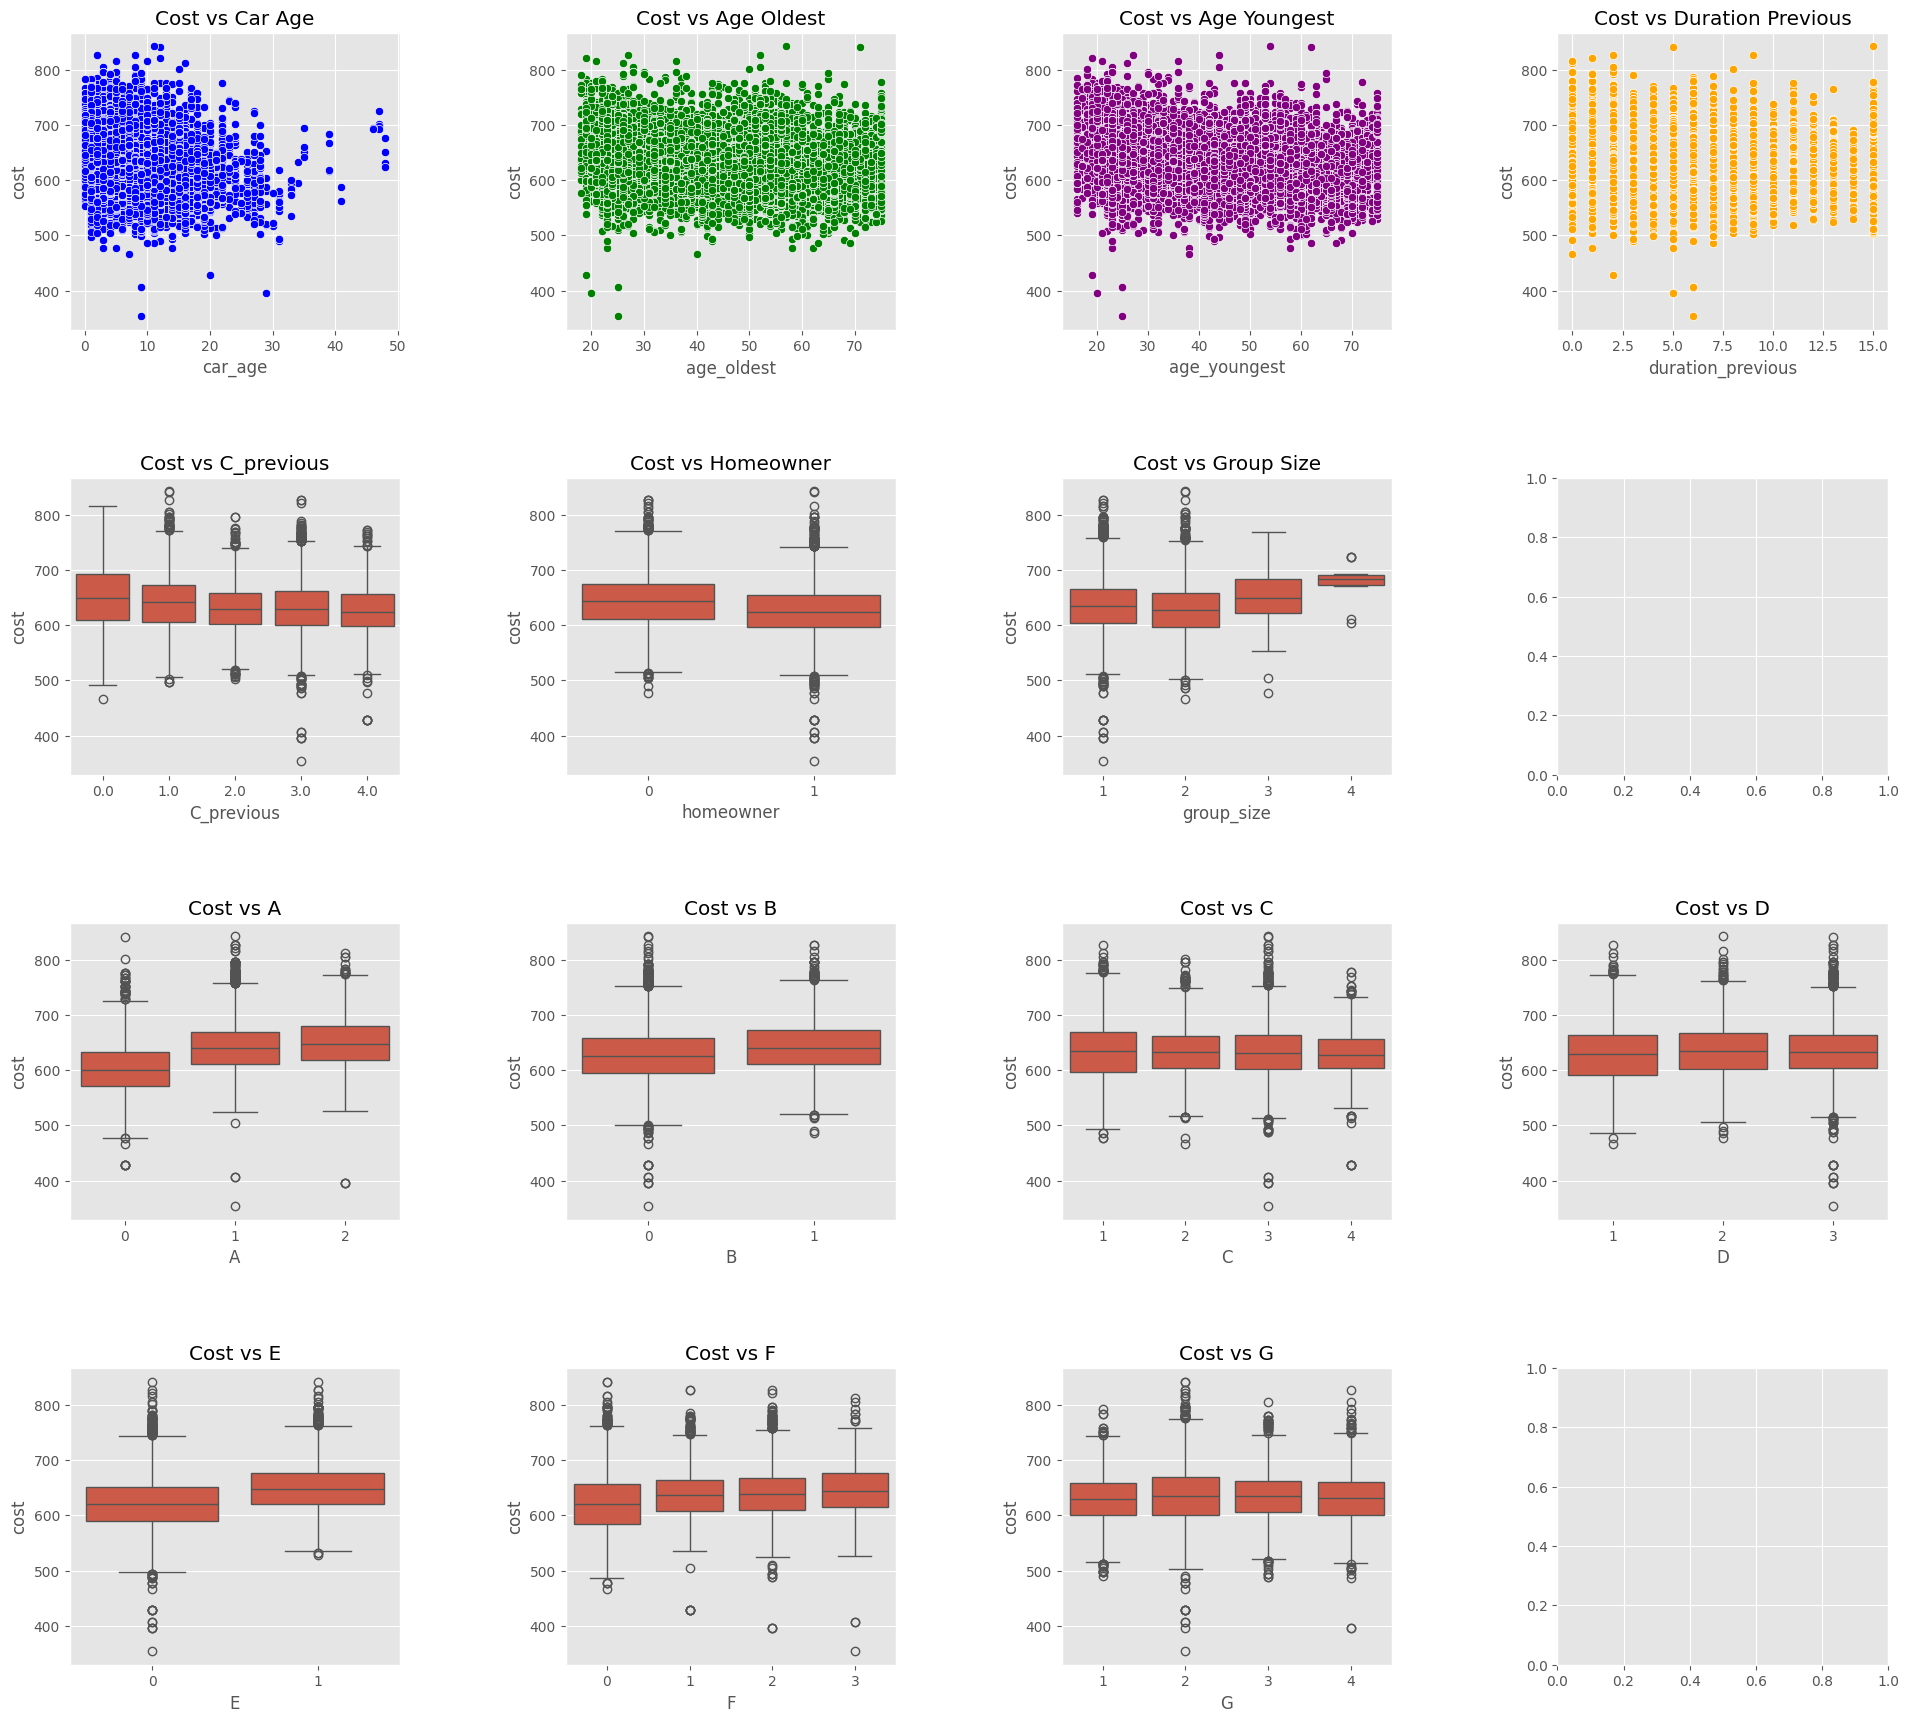

In [58]:
fig, axs = plt.subplots(4, 4, figsize=(20, 18))
fig.tight_layout(pad=5.0)

# numerical variables....scatter plots
sns.scatterplot(data=df, x='car_age', y='cost', ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Cost vs Car Age')

sns.scatterplot(data=df, x='age_oldest', y='cost', ax=axs[0, 1], color='green')
axs[0, 1].set_title('Cost vs Age Oldest')

sns.scatterplot(data=df, x='age_youngest', y='cost', ax=axs[0, 2], color='purple')
axs[0, 2].set_title('Cost vs Age Youngest')

sns.scatterplot(data=df, x='duration_previous', y='cost', ax=axs[0, 3], color='orange')
axs[0, 3].set_title('Cost vs Duration Previous')

# categorical variables....boxplots
sns.boxplot(data=df, x='C_previous', y='cost', ax=axs[1, 0])
axs[1, 0].set_title('Cost vs C_previous')

sns.boxplot(data=df, x='homeowner', y='cost', ax=axs[1, 1])
axs[1, 1].set_title('Cost vs Homeowner')

sns.boxplot(data=df, x='group_size', y='cost', ax=axs[1, 2])
axs[1, 2].set_title('Cost vs Group Size')

sns.boxplot(data=df, x='A', y='cost', ax=axs[2, 0])
axs[2, 0].set_title('Cost vs A')

sns.boxplot(data=df, x='B', y='cost', ax=axs[2, 1])  
axs[2, 1].set_title('Cost vs B')

sns.boxplot(data=df, x='C', y='cost', ax=axs[2, 2])
axs[2, 2].set_title('Cost vs C')

sns.boxplot(data=df, x='D', y='cost', ax=axs[2, 3])
axs[2, 3].set_title('Cost vs D')

sns.boxplot(data=df, x='E', y='cost', ax=axs[3, 0])  
axs[3, 0].set_title('Cost vs E')

sns.boxplot(data=df, x='F', y='cost', ax=axs[3, 1])
axs[3, 1].set_title('Cost vs F')

sns.boxplot(data=df, x='G', y='cost', ax=axs[3, 2])
axs[3, 2].set_title('Cost vs G')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()


----------

### One-Hot Encoding of Categorical Variables

All categorical data is converted to one-hot encoding format to prepare it for modeling and analysis.

In [59]:
# converts categorical variables to one hot encoding
new_df = pd.get_dummies(df, columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'car_value', 'state'], dtype=int)
new_df.head()


,Unnamed: 0,group_size,homeowner,car_age,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,...,state_OR,state_PA,state_RI,state_SD,state_TN,state_UT,state_WA,state_WI,state_WV,state_WY
0,0,1,0,9,0.0,24,24,0,3.0,9.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,9,0.0,24,24,0,3.0,9.0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,7,0.0,74,74,0,2.0,15.0,...,0,1,0,0,0,0,0,0,0,0
3,3,1,1,7,0.0,74,74,0,2.0,15.0,...,0,1,0,0,0,0,0,0,0,0
4,4,1,0,4,4.0,26,26,0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0


----------

## Fitting Multiple Linear Regression

### Splitting Data into Training and Testing Sets

The data is split into training and testing sets using an 80-20 split. The random seed is set to 1337 to ensure reproducibility.

In [60]:
from sklearn.model_selection import train_test_split

# split the dataset into training and testing sets (80-20 split)
# cost is the target
a = new_df.drop(columns =['cost'])  
b = new_df['cost']   

# split data(random seed)
train_a, test_a, train_b, test_b = train_test_split(a, b, test_size=0.2, random_state=1337)

----------

### Fitting a Multiple Linear Regression Model with All Predictors

A multiple linear regression model is fitted to the training data, regressing `cost` against all other variables. This model is called `model_all`. The AIC value of the model is computed.

In [61]:
# add constant for the starting point in the model
constant = sm.add_constant(train_a)

#fit model with all variables
model_all = sm.OLS(train_b, constant).fit()

print (model_all.aic)


123716.65454964116


----------

Based on `model_all`, the states that are most and least expensive are identified using the model coefficients.

In [62]:
# get coefficints for states
state_coeff = model_all.params.filter(like="state")

# finds most and least expensive states based on the coefficint
most_exp_state = state_coeff.idxmax()
least_exp_state = state_coeff.idxmin()

print("Most Expensive State:" ,most_exp_state)
print("Least Expensive State:" ,least_exp_state) 

Most Expensive State: state_DC
Least Expensive State: state_IA


----------

### Interpreting Key Coefficients in the Model

The coefficients of `group_size`, `homeowner`, `car_age`, `risk_factor`, `age_oldest`, `age_youngest`, `married_couple`, and `duration_previous` are interpreted. The signs and values of these coefficients are evaluated to determine whether they make sense in the context of the business problem.

In [63]:
#variables interested in
interest = ['group_size', 'homeowner', 'car_age', 'risk_factor', 'age_oldest', 'age_youngest', 'married_couple', 'duration_previous']

coeff = model_all.params[interest]
coeff


group_size            2.796370
homeowner           -14.099421
car_age              -0.801862
risk_factor          -0.740463
age_oldest            0.566093
age_youngest         -0.957603
married_couple       -9.740524
duration_previous    -1.488666
dtype: float64

- Positive coefficients for group_size and age_oldest mean these things likely increase costs (like bigger groups or older people needing more coverage).
- Negative coefficients for homeowner, car_age, age_youngest, married_couple, and duration_previous mean these might lower costs (like owning a home, being married, or having a longer history of insurance).
- The negative coefficient for risk_factor is odd because we usually expect higher risk lead to higher costs.

----------

### Building a Model with Statistically Significant Variables

Variables from `model_all` that are statistically significant are identified. For categorical variables, significance is determined if at least one of their categories is statistically significant. The model is then refitted using only these significant variables and is called `model_sig`. The performance and characteristics of this model are compared to those of the previous model.

In [64]:
# check pvalues for in the model
p_values = model_all.pvalues

# find variables with pvalues less than 0.05(statically signifcant)
sig_vars = p_values[p_values < 0.05].index
print(sig_vars)

Index(['const', 'Unnamed: 0', 'homeowner', 'car_age', 'risk_factor',
       'age_oldest', 'age_youngest', 'married_couple', 'C_previous',
       'duration_previous', 'A_0', 'A_1', 'A_2', 'B_0', 'B_1', 'C_1', 'C_2',
       'C_3', 'C_4', 'D_1', 'D_2', 'D_3', 'E_0', 'E_1', 'F_0', 'F_1', 'F_2',
       'F_3', 'G_1', 'G_2', 'G_3', 'G_4', 'car_value_b', 'car_value_c',
       'car_value_d', 'car_value_e', 'car_value_f', 'car_value_g',
       'car_value_h', 'state_AL', 'state_AR', 'state_CO', 'state_CT',
       'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_IA', 'state_ID',
       'state_IN', 'state_KY', 'state_MD', 'state_ME', 'state_MO', 'state_ND',
       'state_NH', 'state_NV', 'state_NY', 'state_OK', 'state_PA', 'state_RI',
       'state_TN', 'state_UT', 'state_WA', 'state_WI', 'state_WV'],
      dtype='object')


In [65]:


# keep only significant variables, excluding const
sig_vars_clean = [var for var in sig_vars if var not in 'const']

# new training  and test
train_a_sig = train_a[sig_vars_clean]
test_a_sig = test_a[sig_vars_clean]

train_a_sig_const = sm.add_constant(train_a_sig)

# fit new model
model_sig = sm.OLS(train_b, train_a_sig_const).fit()

print(model_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     163.8
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:27:57   Log-Likelihood:                -61796.
No. Observations:               12386   AIC:                         1.237e+05
Df Residuals:                   12327   BIC:                         1.241e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               208.5569      1.07

In [66]:
print("AIC of model_all:", model_all.aic)
print("AIC of model_sig:" ,model_sig.aic)

AIC of model_all: 123716.65454964116
AIC of model_sig: 123710.33306835101


- Since model_sig has lower AIC, its slightly more efficient model.

----------

### Enhancing the Model with Nonlinear and Interaction Terms

In addition to the variables in `model_sig`, the following terms are added:

1. Square of `age_youngest`  
2. Square term for the age of the car  
3. Interaction term between `car_value` and `age_youngest`  

The resulting model is saved as `model_sig_plus`.

In [67]:
# making copy to avoid changing the original
train_a_sig = train_a_sig.copy()

# add terms
train_a_sig['age_youngest_squared'] = train_a_sig['age_youngest'] ** 2
train_a_sig['car_age_squared'] = train_a_sig['car_age'] ** 2

# handling the interaction term  for car_value because its one-hot encoded with the help of chatgpt
car_value_columns = [col for col in train_a_sig.columns if col.startswith("car_value_")]
for col in car_value_columns:
    train_a_sig[f"{col}_age_youngest"] = train_a_sig[col] * train_a_sig["age_youngest"]


train_a_sig_plus_const = sm.add_constant(train_a_sig)
model_sig_plus = sm.OLS(train_b, train_a_sig_plus_const).fit()

print(model_sig_plus.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     151.6
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:27:57   Log-Likelihood:                -61610.
No. Observations:               12386   AIC:                         1.234e+05
Df Residuals:                   12318   BIC:                         1.239e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

----------

## Feature selection

To reduce the number of features, it can often be helpful to aggregate the categories; for example, we can create a new variable by assigning each state to a larger region:

In [68]:
state_regions = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')
# should download the above file
state_regions

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


---

A new column is created where each state is replaced with the region it belongs to, according to the provided mapping table.

In [69]:
# merge dataset with the state_regions using state code
data_regions = df.merge(state_regions[['State Code', 'Region']], left_on='state', right_on='State Code', how='left')

# add region to new column
data_regions['state_region'] = data_regions['Region']

# drop unnecessary columns
data_regions.drop(['State Code', 'Region'], axis=1, inplace=True)

data_regions.head()


,Unnamed: 0,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,...,duration_previous,A,B,C,D,E,F,G,cost,state_region
0,0,OK,1,0,9,f,0.0,24,24,0,...,9.0,0,0,1,1,0,0,4,543,South
1,1,OK,1,0,9,f,0.0,24,24,0,...,9.0,2,1,1,3,1,3,2,611,South
2,2,PA,1,1,7,f,0.0,74,74,0,...,15.0,2,0,2,3,1,2,2,691,Northeast
3,3,PA,1,1,7,f,0.0,74,74,0,...,15.0,2,0,2,3,1,2,2,695,Northeast
4,4,AR,1,0,4,d,4.0,26,26,0,...,1.0,1,0,1,1,0,2,2,628,South


----------

A model is fitted similar to `model_sig_plus`, but using `region` instead of `state` as a predictor. This new model is called `model_region`.

In [70]:
# making copy to avoid changing the original
train_a_region = train_a_sig.copy()

# add state_region to the feature set 
train_a_region['state_region'] = data_regions['state_region']

# convert state_region column to one-hot encoding
train_a_region = pd.get_dummies(train_a_region, columns=['state_region'], dtype=int)

# add constant for the model
train_a_region_const = sm.add_constant(train_a_region)

# fit the model 
model_region = sm.OLS(train_b, train_a_region_const).fit()

print(model_region.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     147.3
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:27:58   Log-Likelihood:                -61608.
No. Observations:               12386   AIC:                         1.234e+05
Df Residuals:                   12316   BIC:                         1.239e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

----------

### Next Steps for Feature Minimization

- Remove irrelevant features: Some features might not have a useful connection to the target variable. For example, columns that are constant or don't change much can be removed.

- Remove highly correlated features: If two features are highly correlated (e.g., they provide the same information), we can remove one to avoid repetition. This is called multicollinearity, and it can negatively affect the model's performance.

- Use statistical tests: Look at the pvalues from the regression model to see which features are important. Features with high pvalues (usually above 0.05) can be removed.

- Principal Component Analysis (PCA): This method can reduce the number of features by combining them into new components that show the main variations in the data. It helps simplify the model while keeping the key patterns.

----------

### Detecting Multicollinearity Among Numerical Features

In [71]:
# only select the numerical columns
numerical = train_a_region.select_dtypes(include=[np.number]).drop(columns=['age_youngest_squared', 'car_age_squared', 'car_value_b_age_youngest', 'car_value_c_age_youngest', 
'car_value_d_age_youngest', 'car_value_e_age_youngest', 'car_value_f_age_youngest', 'car_value_g_age_youngest', 
'car_value_h_age_youngest'])

# calculate correlation matrix
correlation_matrix = numerical.corr()

# find that are strongly correlated (greater than 0.8 or less than -0.8)
high_correlation = correlation_matrix[(correlation_matrix > 0.8) | (correlation_matrix < -0.8)]

high_correlation


,Unnamed: 0,homeowner,car_age,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A_0,...,state_RI,state_TN,state_UT,state_WA,state_WI,state_WV,state_region_Midwest,state_region_Northeast,state_region_South,state_region_West
Unnamed: 0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
homeowner,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_age,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
risk_factor,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_oldest,NaN,NaN,NaN,NaN,1.0,0.918154,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
state_WV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
state_region_Midwest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
state_region_Northeast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
state_region_South,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


----------

`model_region` is refitted after dropping the redundant predictor(s). The new model is named `model_region_no_oldest`.

In [72]:
# drop age_oldest
train_a_region_no_oldest = train_a_region.drop(columns=['age_oldest'])

# Add constant for new model
train_a_region_no_oldest_const = sm.add_constant(train_a_region_no_oldest)

# fit the model
model_region_no_oldest = sm.OLS(train_b, train_a_region_no_oldest_const).fit()

print(model_region_no_oldest.summary())


                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     146.7
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:27:58   Log-Likelihood:                -61660.
No. Observations:               12386   AIC:                         1.235e+05
Df Residuals:                   12317   BIC:                         1.240e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

----------

### Diagnosing the Fit of `model_region_no_oldest`

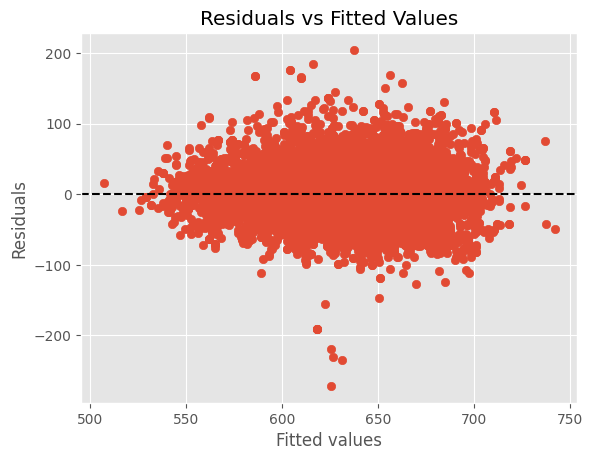

In [73]:
#get fitted values (predicted values) and residuals (differences from actual values)
fitted_values = model_region_no_oldest.fittedvalues
residuals = model_region_no_oldest.resid

plt.scatter(fitted_values, residuals)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

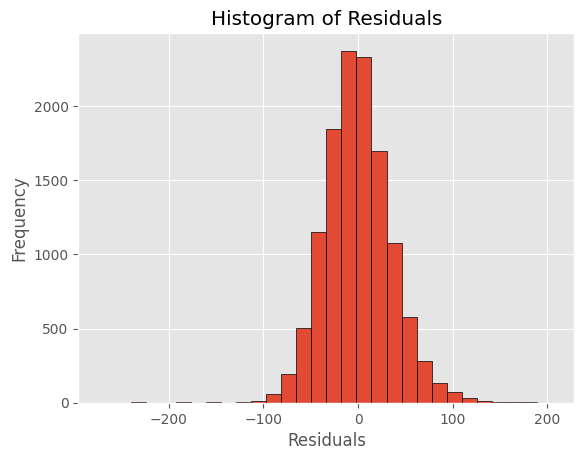

In [74]:
plt.hist(residuals, bins=30, edgecolor="black")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()


**Scatter plot**
- The dots (residuals) are spread out around the zero line. This means the model is doing a good predicting values.
- There is no pattern in the dots, which is good. If there were a pattern, it might mean the model is missing something.

**Histogram:**
- The bars in the histogram show how often different sizes of residuals happen.
- The shape looks like a bell curve, which is good because it means most residuals are small and balanced around zero.

**Conclusion:**
- The plots shows the model is working well, with errors that are random and mostly small.


----------

### Determining the Best Box-Cox Transformation for `cost`

In [75]:
from scipy import stats

#get cost from dataset
cost = df['cost']

# apply Box-Cox transformation to cost
cost_transformed, best_lambda = stats.boxcox(cost)

print(best_lambda)

0.5328143565251654


----------

## Conclusion

In this, we practiced creating linear models using `statsmodels` and iteratively trimming the input variables to go from including all the variables in the dataset to using only the most relevant variables. We excluded those variables that were statistically insignificant and removed those that had high correlation. Finally, we performed some feature engineering in an attempt to remove some tail behavior that deviates from the normal distribution to better fit our linear model. In the end, we had a very minimal model that contained variables that other insurance companies use to charge premiums that gave us insight on how we can better serve a niche population. 